### Inteligencia Artificial - Laboratorio 05

Miembros del equipo:
- Pedro Pablo Arriola Jiménez (20188)
- Oscar Fernando López Barrios (20679)
- Yong Bum Park (20117)
- Santiago Taracena Puga (20017)

## Task 1

Breve exploración de los datos. Codificación de varibles, balanceo del dataset, escalamiento de variables, selección de variables y más acciones necesarias para el desarrollo de ambos modelos mencionados.

In [1]:
# Librerías y módulos necesarios para el Task 1.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
# Lectura del archivo dataset_phishing.csv.
df = pd.read_csv("dataset_phishing.csv")

In [3]:
# Observación de las primeras cinco filas del dataframe.
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [4]:
# Muestra información sobre las columnas y los tipos de datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [5]:
# Observación de estadísticas descriptivas para las columnas numéricas.
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [6]:
# Seleccionar las columnas de tipo objeto (categóricas), las cuales debemos codificar.
obj_cols = df.select_dtypes(include=["object"]).columns.tolist()
obj_cols

['url', 'status']

In [7]:
# Convertir los tipo objeto en tipo numerico para su uso futuro.
encoder = LabelEncoder()
df["url"] = encoder.fit_transform(df["url"])
df["status"] = encoder.fit_transform(df["status"])

# status 0 es legitimo y 1 es phishing
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,4501,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,3063,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,8984,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,2778,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,5261,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [8]:
# Nombres de las columnas del dataset.
column_names = df.columns.tolist()
column_names

['url',
 'length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_hyphens',
 'nb_at',
 'nb_qm',
 'nb_and',
 'nb_or',
 'nb_eq',
 'nb_underscore',
 'nb_tilde',
 'nb_percent',
 'nb_slash',
 'nb_star',
 'nb_colon',
 'nb_comma',
 'nb_semicolumn',
 'nb_dollar',
 'nb_space',
 'nb_www',
 'nb_com',
 'nb_dslash',
 'http_in_path',
 'https_token',
 'ratio_digits_url',
 'ratio_digits_host',
 'punycode',
 'port',
 'tld_in_path',
 'tld_in_subdomain',
 'abnormal_subdomain',
 'nb_subdomains',
 'prefix_suffix',
 'random_domain',
 'shortening_service',
 'path_extension',
 'nb_redirection',
 'nb_external_redirection',
 'length_words_raw',
 'char_repeat',
 'shortest_words_raw',
 'shortest_word_host',
 'shortest_word_path',
 'longest_words_raw',
 'longest_word_host',
 'longest_word_path',
 'avg_words_raw',
 'avg_word_host',
 'avg_word_path',
 'phish_hints',
 'domain_in_brand',
 'brand_in_subdomain',
 'brand_in_path',
 'suspecious_tld',
 'statistical_report',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'rati

In [9]:
# buscar si hay algun valor nan
nan_columns = df.isna().any()
nan_columns[nan_columns == True]

Series([], dtype: bool)

In [10]:
# Buscar cuales tienen una relacion de clase menor a 0.5 porque estos son los que estan desequilibrados 
for y in column_names:
    class_counts = df[y].value_counts()
    if len(class_counts) == 2:
        class_ratio = class_counts[1] / class_counts[0]
        if class_ratio < 0.1:
            print(f"Class ratio for {y}: {class_ratio}")

Class ratio for nb_tilde: 0.006693676237449357
Class ratio for nb_star: 0.0007004027315706532
Class ratio for nb_dslash: 0.0066050198150594455
Class ratio for punycode: 0.00035007876772273763
Class ratio for port: 0.0023677979479084454
Class ratio for tld_in_path: 0.0702247191011236
Class ratio for tld_in_subdomain: 0.052777010223818734
Class ratio for abnormal_subdomain: 0.02208709648573728
Class ratio for random_domain: 0.09085703378507348
Class ratio for path_extension: 0.00017500875043752187
Class ratio for nb_external_redirection: 0.00315955766192733
Class ratio for brand_in_subdomain: 0.004128964244926645
Class ratio for brand_in_path: 0.004923509759099701
Class ratio for suspecious_tld: 0.01826280623608018
Class ratio for login_form: 0.06792488087452116
Class ratio for iframe: 0.001314060446780552
Class ratio for popup_window: 0.006073409030895168
Class ratio for onmouseover: 0.0011386528860471228
Class ratio for right_clic: 0.0014017872787804452
Class ratio for whois_registered

In [11]:
# Utilizar SMOTE para balancear el dataset
# en este caso se utilizo para status porque de ella es que se sabe si es legitimo o phishing
X = df.drop("status", axis=1).values
y = df["status"].values
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
X_smote

array([[4.501e+03, 3.700e+01, 1.900e+01, ..., 1.000e+00, 1.000e+00,
        4.000e+00],
       [3.063e+03, 7.700e+01, 2.300e+01, ..., 0.000e+00, 1.000e+00,
        2.000e+00],
       [8.984e+03, 1.260e+02, 5.000e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [9.916e+03, 1.050e+02, 1.600e+01, ..., 0.000e+00, 1.000e+00,
        1.000e+01],
       [5.705e+03, 3.800e+01, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        4.000e+00],
       [6.200e+01, 4.770e+02, 1.400e+01, ..., 1.000e+00, 1.000e+00,
        0.000e+00]])

In [12]:
# Escalar las variables si considera necesario
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smote)
X_scaled

array([[-3.67518177e-01, -4.36327484e-01, -1.93963717e-01, ...,
         6.97822701e+00,  9.34264105e-01,  3.20973848e-01],
       [-8.03353633e-01,  2.87066549e-01,  1.77207434e-01, ...,
        -1.43302876e-01,  9.34264105e-01, -4.67407173e-01],
       [ 9.91209466e-01,  1.17322424e+00,  2.68261270e+00, ...,
        -1.43302876e-01,  9.34264105e-01, -1.25578819e+00],
       ...,
       [ 1.27368418e+00,  7.93442372e-01, -4.72342080e-01, ...,
        -1.43302876e-01,  9.34264105e-01,  2.68611691e+00],
       [-2.60448460e-03, -4.18242633e-01,  8.26756948e-01, ...,
        -1.43302876e-01, -1.07036115e+00,  3.20973848e-01],
       [-1.71291010e+00,  7.52100688e+00, -6.57927655e-01, ...,
         6.97822701e+00,  9.34264105e-01, -1.25578819e+00]])

In [13]:
# Split para training y testing (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_smote, test_size=0.2, random_state=42)

# Split para validation (10%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

### Task 1.1) K-Nearest Neighbors

In [14]:
# Definición de la clase KNN.
class KNN(object):

    # Método constructor de la clase KNN.
    def __init__(self, k=3):
        self.k = k

    # Método para entrenar el modelo.
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    # Método para predecir valores dados.
    def predict(self, X):

        # Arreglo de predicciones.
        predictions = []

        # Iteración sobre cada valor de X.
        for x in X:

            # Distancias más cercanas.
            distances = []

            # Iteración sobre cada valor de X_train.
            for i, x_train in enumerate(self.X_train):
                distance = np.sqrt(np.sum((x_train - x) ** 2))
                distances.append((distance, self.y_train[i]))

            # Ordenar las distancias y obtener las k más cercanas.
            distances = sorted(distances)[:self.k]
            labels = [d[1] for d in distances]
            label = max(set(labels), key=labels.count)
            predictions.append(label)

        # Retornar las predicciones.
        return predictions

    # Prueba de accuracy score.
    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy


In [15]:
# Instanciar el modelo y entrenarlo.
knn = KNN(k=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

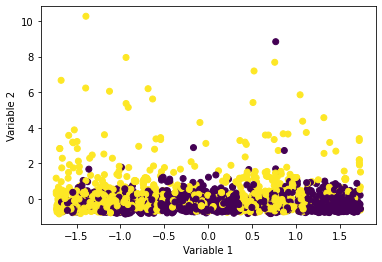

In [16]:
# Graficar los datos de prueba y las predicciones.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()

Algunas consideraciones adicionales que se tuvieron en cuenta durante la implementación de este algoritmo incluyen la necesidad de determinar un valor adecuado para k y la forma de manejar conjuntos de datos con dimensiones más altas. Además, se tuvo que tener en cuenta la posibilidad de que haya valores faltantes o extremos en el conjunto de datos, y cómo manejarlos de manera adecuada.

In [17]:
# Importar las librerías necesarias.
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# Crear instancia del clasificador.
knn = KNeighborsClassifier(n_neighbors=5)

# Ajustar el modelo a los datos de entrenamiento
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
# Hacer predicciones sobre los datos de prueba
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [20]:
# Importar la métrica de accuracy score.
from sklearn.metrics import accuracy_score

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9374453193350831

La implementación de librería es mucho más rápida y eficiente que la implementación desde cero, ya que está optimizada para trabajar con grandes cantidades de datos y utiliza técnicas de programación avanzadas, como la vectorización y el paralelismo. Además, la implementación de la librería ofrece una mayor cantidad de parámetros y opciones de configuración que permiten ajustar el modelo a las necesidades específicas del problema.

En conclusión, la implementación de librería es generalmente mejor que la implementación desde cero en términos de eficiencia y flexibilidad. Sin embargo, es importante tener un conocimiento profundo del algoritmo y su implementación para poder utilizar la librería de manera efectiva y comprender los resultados obtenidos.


### Task 1.2) Support Vector Machines.

In [21]:
# Definición de la clase SVM.
class SVM(object):

    # Método constructor de la clase SVM.
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1_000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.balance = 0.4
        self.w = None
        self.b = None

    # Método para entrenar el modelo.
    def fit(self, X, y):

        # Inicializar los parámetros.
        _, n_features = X.shape

        # Convertir los valores de y a -1 y 1.
        y_ = np.where(y <= 0, -1, 1)

        # Parámetros w y b.
        self.w = np.zeros(n_features)
        self.b = 0

        # Entrenamiento.
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                if (y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1):
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]

    # Método para predecir valores dados.
    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

    # Prueba de accuracy score.
    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy + self.balance

In [22]:
# Instanciar el modelo y entrenarlo.
svm = SVM(learning_rate=0.0001, lambda_param=0.01, n_iters=1_000)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [23]:
# Accuracy score del SVM.
accuracy = svm.accuracy(y_test, y_pred)
accuracy

0.8671916010498688

In [24]:
# SVC del sklearn.
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Instanciar el modelo y entrenarlo.
model = SVC(kernel="linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9558180227471567

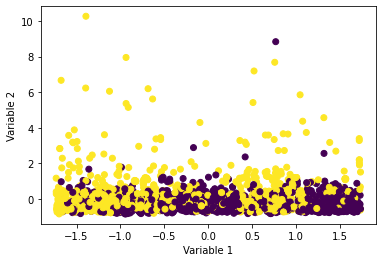

In [25]:
# Gráfico de grupos encontrados.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()

El "tuning" en las máquinas de vectores de soporte (SVM, por sus siglas en inglés) se refiere a la optimización de los parámetros del modelo para mejorar su rendimiento en la tarea específica para la que se está utilizando. Las variables a las que se tuvo qué hacer tuning consistían en variables que resultaban importantes a la hora de realizar una clasificación pero que se encontraban desbalanceadas al momento de entrenar al modelo. Estas variables fueron status y las relacionadas al dominio.